<a href="https://colab.research.google.com/github/nagabathula/C255-DataMIning/blob/main/Assignment_4_PCA_and_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [102]:
Iris = pd.read_csv('/content/IRIS.csv')

In [104]:
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [106]:
X = Iris[['sepal_length','sepal_length','sepal_length','sepal_length']]
y = Iris.species

In [107]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [108]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)


In [109]:
import numpy as np

X_mean = np.mean(X, axis=0)
# cov_mat = np.cov(X)
cov_mat = (X - X_mean).T.dot((X - X_mean)) / (X.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[1.00671141 1.00671141 1.00671141 1.00671141]
 [1.00671141 1.00671141 1.00671141 1.00671141]
 [1.00671141 1.00671141 1.00671141 1.00671141]
 [1.00671141 1.00671141 1.00671141 1.00671141]]


In [110]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.8660254   0.5         0.          0.        ]
 [ 0.28867513  0.5        -0.57735027 -0.57735027]
 [ 0.28867513  0.5         0.78867513 -0.21132487]
 [ 0.28867513  0.5        -0.21132487  0.78867513]]

Eigenvalues 
[4.44089210e-16 4.02684564e+00 0.00000000e+00 0.00000000e+00]


In [111]:
u,s,v = np.linalg.svd(X.T)
u

array([[-5.00000000e-01,  8.66025404e-01,  7.49400542e-16,
        -8.32667268e-17],
       [-5.00000000e-01, -2.88675135e-01,  8.16496581e-01,
        -4.65558222e-16],
       [-5.00000000e-01, -2.88675135e-01, -4.08248290e-01,
        -7.07106781e-01],
       [-5.00000000e-01, -2.88675135e-01, -4.08248290e-01,
         7.07106781e-01]])

In [112]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
4.026845637583892
4.440892098500626e-16
0.0
0.0


In [113]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([100., 100., 100., 100.])

In [115]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.5        -0.8660254 ]
 [ 0.5         0.28867513]
 [ 0.5         0.28867513]
 [ 0.5         0.28867513]]


In [116]:
Y = X.dot(matrix_w)

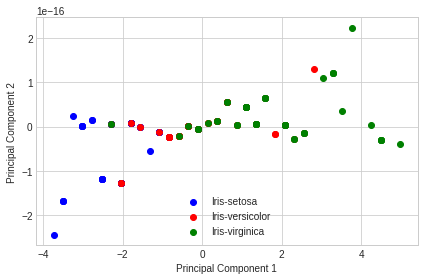

In [117]:
import matplotlib.pyplot as plt

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0], Y[y==lab, 1], label=lab, c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()